In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
dataframe = pd.read_csv('cleaned_crabs.csv')

In [3]:
dataframe.head()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class
0,0,blue,male,1,8.1,6.7,16.1,19.0,7.0,bluemale
1,1,blue,male,2,8.8,7.7,18.1,20.8,7.4,bluemale
2,2,blue,male,3,9.2,7.8,19.0,22.4,7.7,bluemale
3,3,blue,male,4,9.6,7.9,20.1,23.1,8.2,bluemale
4,4,blue,male,5,9.8,8.0,20.3,23.0,8.2,bluemale


In [4]:
dataframe.tail()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class
195,195,orange,female,46,21.4,18.0,41.2,46.2,18.7,orangefemale
196,196,orange,female,47,21.7,17.1,41.7,47.2,19.6,orangefemale
197,197,orange,female,48,21.9,17.2,42.6,47.4,19.5,orangefemale
198,198,orange,female,49,22.5,17.2,43.0,48.7,19.8,orangefemale
199,199,orange,female,50,23.1,20.2,46.2,52.5,21.1,orangefemale


### Standerizing :



Standardizing is the process of transforming the values of features in a dataset to have a mean of 0 and a standard deviation of 1. This technique is also known as Z-score normalization or standard scaling.



1. **Standard Scaling (Z-score normalization):**
   - Standardizes features by transforming them to have a mean of 0 and a standard deviation of 1.
   - Formula: \[X_{\text{scaled}} = \frac{X - \text{mean}(X)}{\text{std}(X)}\]
   - Suitable when the data follows a Gaussian distribution and for algorithms sensitive to the scale of features, such as gradient-based methods.



In [5]:
data_columns = ['frontal_lobe', 'rear_width', 'carapace_midline', 'maximum_width', 'body_depth']

standard_dataframe = dataframe.copy()
standard_dataframe[data_columns] = StandardScaler().fit_transform(standard_dataframe[data_columns])

In [6]:
standard_dataframe.head()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class
0,0,blue,male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,bluemale
1,1,blue,male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,bluemale
2,2,blue,male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,bluemale
3,3,blue,male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,bluemale
4,4,blue,male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,bluemale


## t-Stochastic Neighbor Embedding :

t-SNE, or t-distributed stochastic neighbor embedding, is a nonlinear dimensionality reduction technique used for visualizing high-dimensional data. It preserves local and global relationships between data points, revealing intricate structures and clusters. The perplexity parameter controls the balance between global and local preservation. t-SNE is widely employed for data exploration and visualization, providing insights into the inherent patterns and similarities within the dataset

### t-SNE on Standerized Data :

### t-SNE on 2 Dimensions :

In [7]:
tsne_dataframe = TSNE(n_components = 2, 
                      perplexity = 10, 
                      n_iter = 2000,
                      init = 'random').fit_transform(standard_dataframe[data_columns])

standard_dataframe[['TSNE1', 'TSNE2']] = tsne_dataframe

In [8]:
standard_dataframe.head()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class,TSNE1,TSNE2
0,0,blue,male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,bluemale,-53.649628,-15.370861
1,1,blue,male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,bluemale,-51.930302,-16.711309
2,2,blue,male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,bluemale,-50.385075,-17.032097
3,3,blue,male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,bluemale,-48.945675,-17.810175
4,4,blue,male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,bluemale,-48.692825,-18.930344


<AxesSubplot: xlabel='TSNE1', ylabel='TSNE2'>

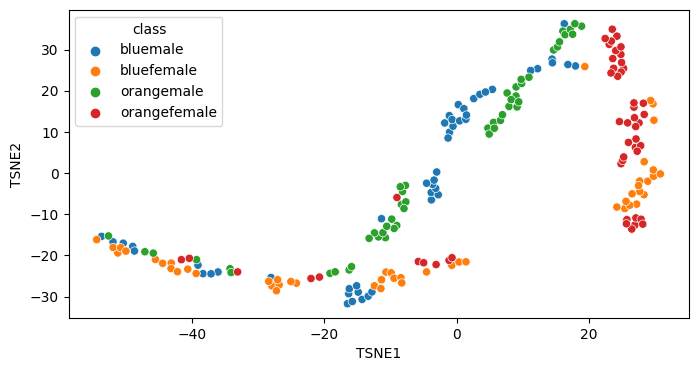

In [9]:
figure = plt.figure(figsize = (8, 4))
sns.scatterplot(x = 'TSNE1', 
                y = 'TSNE2', 
                hue = 'class', data = standard_dataframe)

### t-SNE on 3 Dimensions :

In [10]:
tsne_dataframe = TSNE(n_components = 3, 
                      perplexity = 10, 
                      n_iter = 2000,
                      init = 'random').fit_transform(standard_dataframe[data_columns])

standard_dataframe[['TSNE1', 'TSNE2', 'TSNE3']] = tsne_dataframe

In [11]:
standard_dataframe.head()

,Unnamed: 0,specise,sex,index,frontal_lobe,rear_width,carapace_midline,maximum_width,body_depth,class,TSNE1,TSNE2,TSNE3
0,0,blue,male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,bluemale,-1.414653,-16.306826,-4.862922
1,1,blue,male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,bluemale,-1.339649,-15.244018,-5.327429
2,2,blue,male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,bluemale,-1.399865,-14.892200,-6.130044
3,3,blue,male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,bluemale,-1.219715,-14.290673,-6.853943
4,4,blue,male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,bluemale,-1.198350,-13.984381,-6.896729


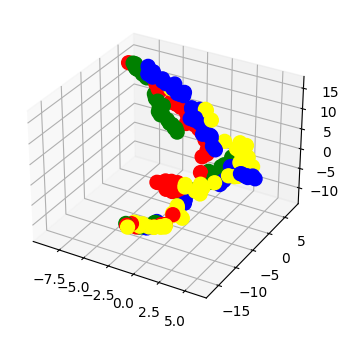

In [12]:
fig = plt.figure(figsize = (8, 4))

crab_colors = {'bluemale':'red', 
               'bluefemale':'yellow', 
               'orangemale':'green', 
               'orangefemale': 'blue'}
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(standard_dataframe.TSNE1, 
            standard_dataframe.TSNE2, 
            zs = standard_dataframe.TSNE3, 
            depthshade = False, 
            c = standard_dataframe['class'].apply(lambda x: crab_colors[x]), s = 100)